In [5]:
words = open('names.txt', 'r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [8]:
len(words)

32033

In [11]:
list_of_len_of_words = ([len(w) for w in words])

In [12]:
min(list_of_len_of_words)

2

In [13]:
max(list_of_len_of_words)

15

In [14]:
b = dict()
for word in words:
    chs = '<S>' + word + '<E>'
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1
         

In [19]:
sorted(b.items(), key= lambda kv_pair: -kv_pair[1]) # sort the list with the value of the 1st (0-indexing) dimension in descending order.

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [21]:
import torch

In [22]:
x = 1.0
print(type(x))

<class 'float'>


In [23]:
N = torch.zeros((27,27))

In [27]:
N.dtype

torch.float32

In [34]:
chars = sorted(list(set(''.join(words))))
chars

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [38]:
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [135]:
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [6]:
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1
N

NameError: name 'stoi' is not defined

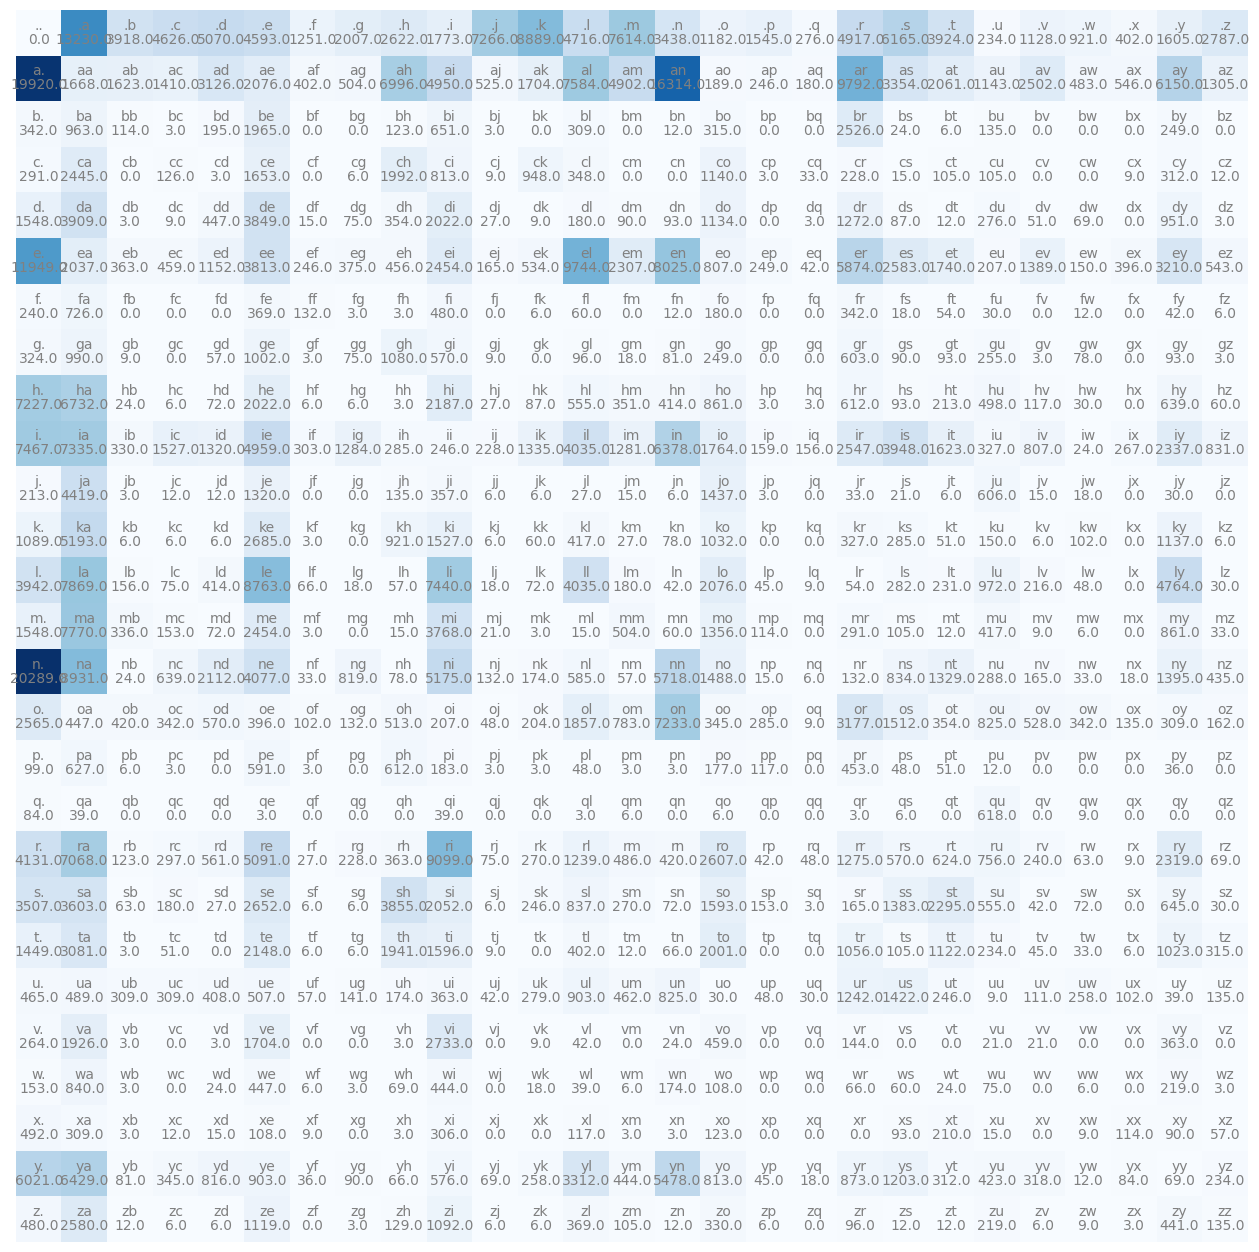

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [60]:
N[0]

tensor([    0., 13230.,  3918.,  4626.,  5070.,  4593.,  1251.,  2007.,  2622.,
         1773.,  7266.,  8889.,  4716.,  7614.,  3438.,  1182.,  1545.,   276.,
         4917.,  6165.,  3924.,   234.,  1128.,   921.,   402.,  1605.,  2787.])

In [117]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [121]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'c'

In [131]:
# By using the same seed, you ensure that the random numbers generated are the same across different runs of the same program. 
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p

tensor([0.7081, 0.3542, 0.1054])

In [70]:
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [123]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [124]:
p.shape

torch.Size([3])

In [95]:
P = (N+1).float()

P.sum(1, keepdim=True).shape

torch.Size([27, 1])

In [142]:
P = (N+1).float()
P /= P.sum(0, keepdims=True)
P

tensor([[1.0403e-05, 1.3012e-01, 4.9221e-01, 4.3556e-01, 3.0705e-01, 7.4948e-02,
         4.5660e-01, 3.4573e-01, 1.1467e-01, 3.3390e-02, 8.3270e-01, 5.8691e-01,
         1.1257e-01, 3.8165e-01, 6.2518e-02, 4.9645e-02, 4.9791e-01, 3.2859e-01,
         1.2899e-01, 2.5328e-01, 2.3451e-01, 2.4915e-02, 1.4575e-01, 3.2765e-01,
         1.9027e-01, 5.4710e-02, 3.8610e-01],
        [2.0724e-01, 1.6414e-02, 2.0397e-01, 1.3283e-01, 1.8934e-01, 3.3885e-02,
         1.4697e-01, 8.6949e-02, 3.0588e-01, 9.3187e-02, 6.0273e-02, 1.1256e-01,
         1.8102e-01, 2.4573e-01, 2.9659e-01, 7.9735e-03, 7.9549e-02, 2.1471e-01,
         2.5685e-01, 1.3781e-01, 1.2320e-01, 1.2129e-01, 3.2313e-01, 1.7200e-01,
         2.5826e-01, 2.0954e-01, 1.8086e-01],
        [3.5682e-03, 9.4805e-03, 1.4444e-02, 3.7654e-04, 1.1868e-02, 3.2074e-02,
         3.6470e-04, 1.7218e-04, 5.4208e-03, 1.2272e-02, 4.5835e-04, 6.6020e-05,
         7.3984e-03, 5.0118e-05, 2.3633e-04, 1.3261e-02, 3.2206e-04, 1.1862e-03,
         6.6278e-

In [145]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix = 0
    while True:
        p = P[ix]
        # samples from the given probability distribution represented by the tensor p. The tensor p should contain non-negative values, which do not necessarily have to sum to 1 (if they don't, torch.multinomial will internally normalize them to form a probability distribution).
        # p is the input tensor representing probabilities of each category. Each value in p stands for the probability of selecting that index. The probabilities are assumed to be along the last dimension.
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))
    # print(''.join(out))

cexze.
zoghkurkicqukwydwevizimittain.
juffk.
kavig.
jomiviubrtthrugotzi.


In [134]:
# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

# log(a*b*c) = log(a) + log(b) + log(c)

In [147]:
stoi['.']

0

In [156]:
# log_likelihood = 0.0
# n = 0
# 
# # for w in words:
# for w in ["andrejq"]:
#   chs = ['.'] + list(w) + ['.']
#   for ch1, ch2 in zip(chs, chs[1:]):
#     ix1 = stoi[ch1]
#     ix2 = stoi[ch2]
#     prob = P[ix1, ix2]
#     logprob = torch.log(prob)
#     log_likelihood += logprob
#     n += 1
#     print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

# print(f'{log_likelihood=}')
# nll = -log_likelihood
# print(f'{nll=}')
# print(f'{nll/n}')

log_likelihood = 0.0
n = 0

for w in ["andrejq"]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')
print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')
        


.a: 0.1301 -2.0393
an: 0.2966 -1.2154
nd: 0.1279 -2.0562
dr: 0.0334 -3.3995
re: 0.0831 -2.4880
ej: 0.0190 -3.9622
jq: 0.0012 -6.7370
q.: 0.0009 -7.0308
log_likelihood=tensor(-28.9284)
nll=tensor(28.9284)
3.616044044494629


In [151]:
words[:1]

['emma']

In [241]:
# create the training set of bigrams (x,y)
xs, ys = [], []

# Every element of xs or ys is just the index of that character.

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)
        # print(ix1, ix2)
        
# for w in words[:1]:
#   chs = ['.'] + list(w) + ['.']
#   for ch1, ch2 in zip(chs, chs[1:]):
#     ix1 = stoi[ch1]
#     ix2 = stoi[ch2]
#     print(ch1, ch2)
#     xs.append(ix1)
#     ys.append(ix2)
    
xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [242]:
xs

tensor([ 0,  5, 13, 13,  1])

In [243]:
ys

tensor([ 5, 13, 13,  1,  0])

In [244]:
import torch.nn.functional as F

xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [245]:
xenc.shape


torch.Size([5, 27])

In [246]:
xenc.dtype

torch.float32

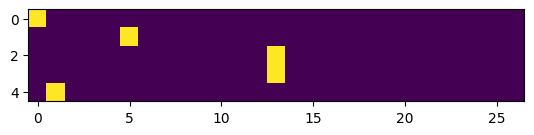

In [247]:
plt.imshow(xenc)

In [248]:
W = torch.randn((27, 1))

# (5 * 27) * (27 * 1)
xenc @ W

tensor([[-1.0383],
        [ 0.7270],
        [-0.1380],
        [-0.1380],
        [ 0.3725]])

In [249]:
logits = xenc @ W # typicalley called 'logits', since logits function is a reverse dunction of exp, and we will apply exp to the logits afterwards.

# Each one-hot encoding dot products  a matrix, the result is like selecting a row of that matrix.
# For example, ont-hot encoding [1,0,0,...] dot products a matrix produces the 0-th row of that matrix, in our case is [ 1.2069].
logits

tensor([[-1.0383],
        [ 0.7270],
        [-0.1380],
        [-0.1380],
        [ 0.3725]])

In [250]:
W

tensor([[-1.0383],
        [ 0.3725],
        [ 0.1318],
        [ 0.4943],
        [ 0.5135],
        [ 0.7270],
        [-0.4892],
        [ 0.6076],
        [-2.1463],
        [ 0.3151],
        [-0.1917],
        [-0.3596],
        [-0.9683],
        [-0.1380],
        [ 1.0747],
        [-1.4065],
        [-0.9105],
        [ 2.4313],
        [-0.7657],
        [ 0.9191],
        [-1.2187],
        [ 2.1087],
        [-0.8849],
        [-0.0697],
        [ 0.1057],
        [ 0.6188],
        [-1.9800]])

In [251]:
counts = logits.exp() # equivalent N
counts

tensor([[0.3541],
        [2.0689],
        [0.8711],
        [0.8711],
        [1.4514]])

In [252]:
counts.sum(0, keepdims=True)

tensor([[5.6165]])

In [253]:
# 5 * 1
# 1 * 1 (broad-casting)
probs = counts / counts.sum(0, keepdims=True)
probs
# btw: the last 2 lines here are together called a 'softmax'

tensor([[0.0630],
        [0.3684],
        [0.1551],
        [0.1551],
        [0.2584]])

In [254]:
probs[0]

tensor([0.0630])

In [255]:
probs.shape

torch.Size([5, 1])

In [256]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

In [257]:
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'

In [258]:
probs.shape

torch.Size([5, 27])

In [260]:
for i in range(5):
    print(i)

0
1
2
3
4


In [259]:
nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label (ground truth) character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())


--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.012286253273487091
log likelihood: -4.3992743492126465
negative log likelihood: 4.3992743492126465
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the net to the the correct character:

In [ ]:
nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label (ground truth) character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll


In [269]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [297]:
xs

tensor([ 0,  5, 13, 13,  1])

In [298]:
ys

tensor([ 5, 13, 13,  1,  0])

In [299]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(5), ys].log().mean()

In [300]:
counts.sum(1, keepdim=True)

tensor([[79.0145],
        [55.3268],
        [38.9116],
        [38.9116],
        [34.1630]], grad_fn=<SumBackward1>)

In [301]:
[torch.arange(5), ys]

[tensor([0, 1, 2, 3, 4]), tensor([ 5, 13, 13,  1,  0])]

In [302]:
probs

tensor([[0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
         0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
         0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
        [0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
         0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
         0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0150, 0.0086,

tensor([-0.0123, -0.0181, -0.0267, -0.0737, -0.0150], grad_fn=<NegBackward0>)

In [303]:
print(loss.item())

3.7693049907684326


In [304]:
# backward pass
W.grad = None # set to zero the gradient
loss.backward()

In [305]:
W.data += -0.1 * W.grad

In [318]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)
print(xs, len(xs))
print(ys, len(ys))

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)



number of examples:  228146
tensor([ 0,  5, 13,  ..., 25, 26, 24]) 228146
tensor([ 5, 13, 13,  ..., 26, 24,  0]) 228146


In [331]:
# gradient descent
for k in range(100):
  
  # forward pass
  # For each element (character) in `xs`, encode it to a 27-D one-hot vector.
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.1*(W**2).mean()
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  # update
  W.data += -50 * W.grad


2.5875258445739746
2.5874829292297363
2.58744215965271
2.587402582168579
2.58736515045166
2.5873289108276367
2.587294101715088
2.5872604846954346
2.5872280597686768
2.5871973037719727
2.587167501449585
2.5871388912200928
2.587110996246338
2.5870847702026367
2.587059259414673
2.5870347023010254
2.5870113372802734
2.586988687515259
2.5869665145874023
2.5869455337524414
2.5869252681732178
2.5869057178497314
2.5868871212005615
2.5868687629699707
2.5868513584136963
2.586834669113159
2.5868184566497803
2.5868027210235596
2.586787700653076
2.586773157119751
2.586759567260742
2.5867459774017334
2.586732864379883
2.5867204666137695
2.5867083072662354
2.5866968631744385
2.5866856575012207
2.586674690246582
2.5866644382476807
2.5866539478302
2.586644411087036
2.586635112762451
2.5866262912750244
2.5866174697875977
2.586609125137329
2.5866010189056396
2.58659291267395
2.586585521697998
2.586577892303467
2.5865707397460938
2.586564064025879
2.586557388305664
2.5865511894226074
2.586544990539551
2.5

In [322]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

cexze.
momakurailezityha.
konimittain.
llayn.
ka.


In [324]:
torch.tensor([ix])

tensor([0])